# Shapley Game

In [1]:
import numpy as np
from IPython import display
from ThreeTimesThreeFunctions import updateStrategy, plot, calculateFrequencies, plotFrequencies, systematicPlots, randomPlots

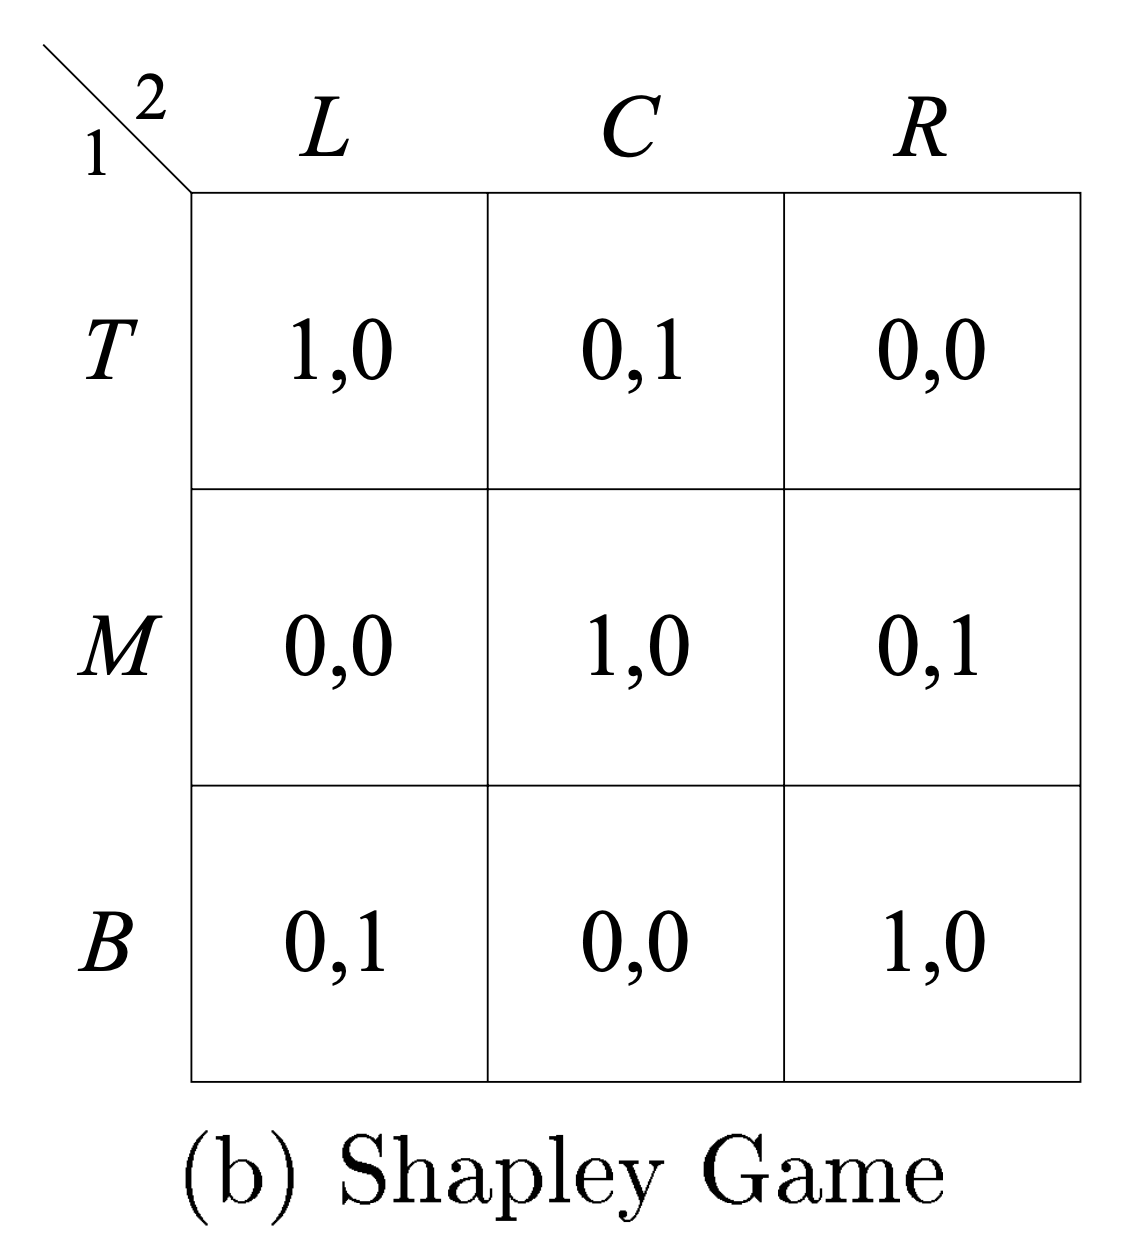

In [2]:
display.Image("/Users/henningheyen/Desktop/Studium/TUM/BachelorThesis/Git/NoRegretLearning/Screenshots/Shapley.png", width = 300)

In [25]:
######### Initialization ######### (note: utility maximization)

# player 1:
payoff1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

# player 2:
payoff2 = np.array([[0,1,0],[0,0,1],[1,0,0]])

#number of iterations
iterations = int(300)

#game title
gameName = "Shapley Game"

#name of actions. Strategy1 refers to player 1
nameOfStrategy1Action1 = "T"
nameOfStrategy1Action2 = "M"
nameOfStrategy1Action3 = "B"
nameOfStrategy2Action1 = "L"
nameOfStrategy2Action2 = "C"
nameOfStrategy2Action3 = "R"

strategyNames = [nameOfStrategy1Action1,nameOfStrategy1Action2, nameOfStrategy1Action3,
                nameOfStrategy2Action1, nameOfStrategy2Action2, nameOfStrategy2Action3]

######### Equilibria #########

#Pure Nash Equilibria 
pne = []

#Mixed Nash Equilibria 
#sytax: [..., [[P(Strategy1Action1), P(Strategy2Action2), P(Strategy2Action3)],
#              [P(Strategy2Action1), P(Strategy2Action2), P(Strategy2Action3)]], ...]
mne = [[[1/3,1/3,1/3],[1/3,1/3,1/3]]]

In [14]:
# INITIALIAL STRATEGY # 
strategy1init = np.array([1/9,2/9,6/9])
strategy2init = np.array([2/7,4/7,1/7])

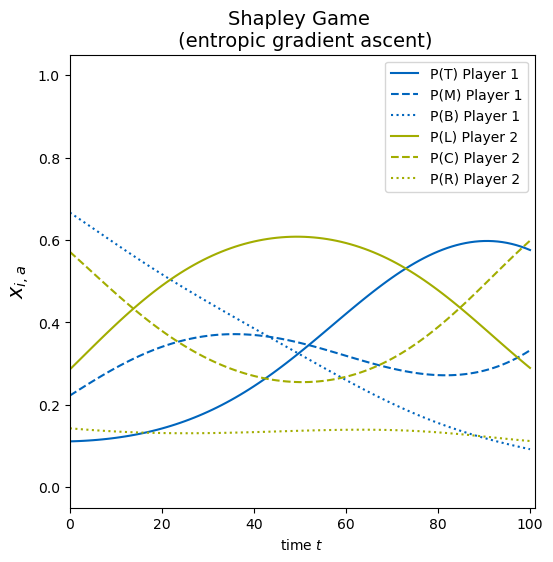

In [15]:
# NORMALIZED EXPONENTIALED GRADIENT #

strategy1, strategy2 = updateStrategy(iterations, payoff1, payoff2, strategy1init, strategy2init, "EGA")
plot(iterations, strategy1, strategy2, gameName, strategyNames, "EGA")

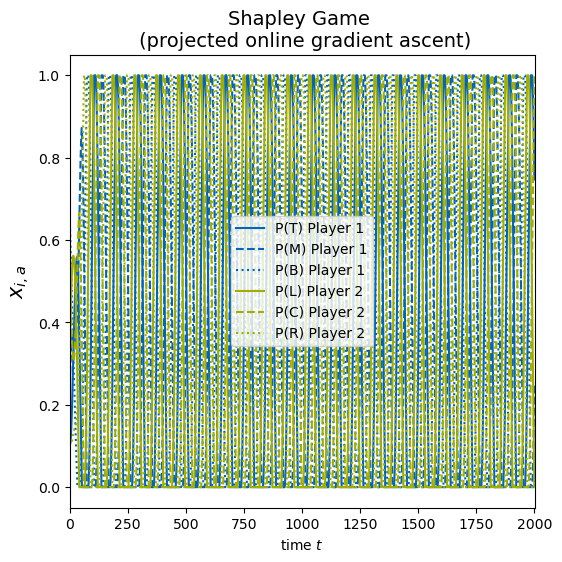

In [6]:
# ONLINE GRADIENT ASCENT WITH LAZY PROJECTION #

strategy1, strategy2 = updateStrategy(iterations, payoff1, payoff2, strategy1init, strategy2init, "POGA")
plot(iterations, strategy1, strategy2, gameName, strategyNames, "POGA")

In [8]:
n_per_dim = 0
systematicPlots(n_per_dim, gameName, strategyNames,
                    iterations, payoff1, payoff2, "POGA", figsize = 4)

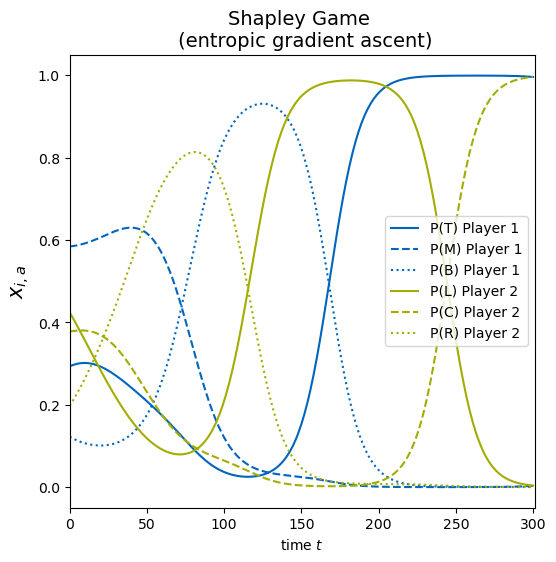

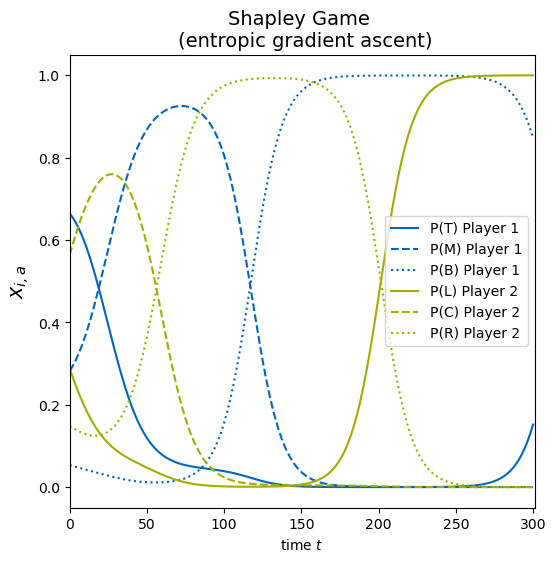

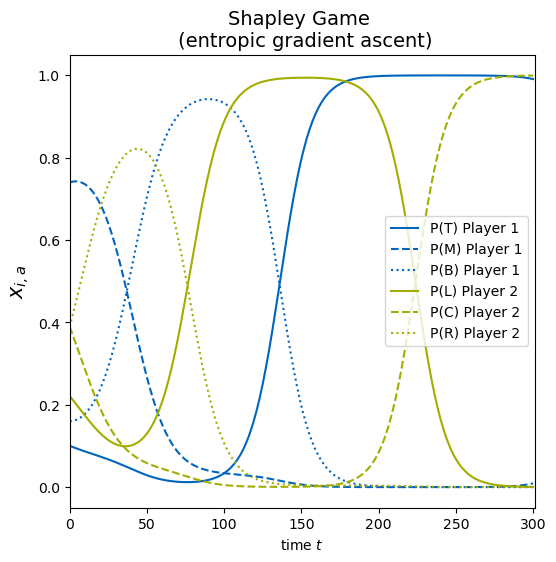

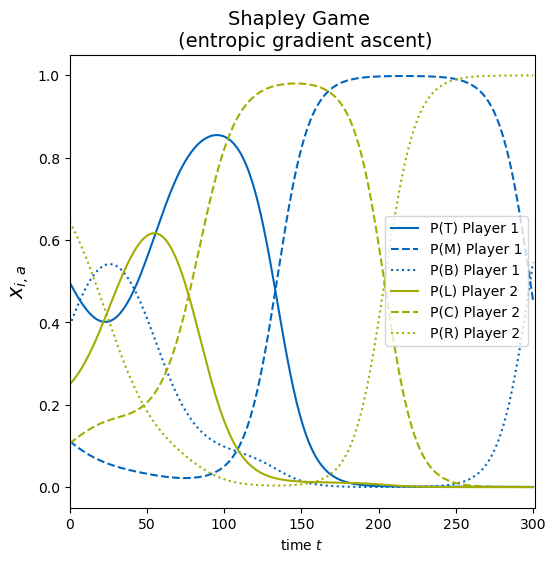

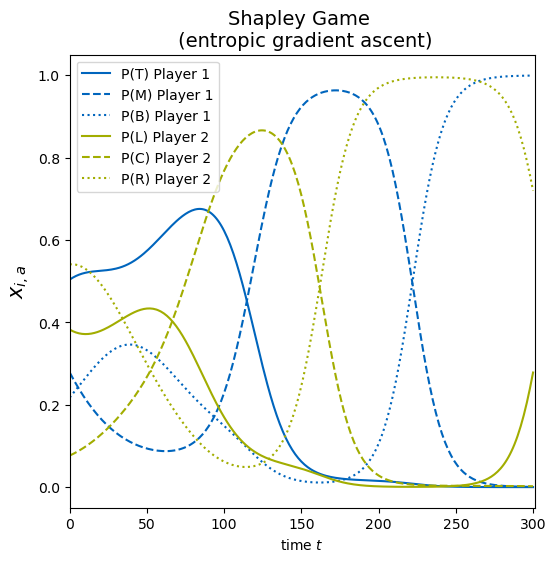

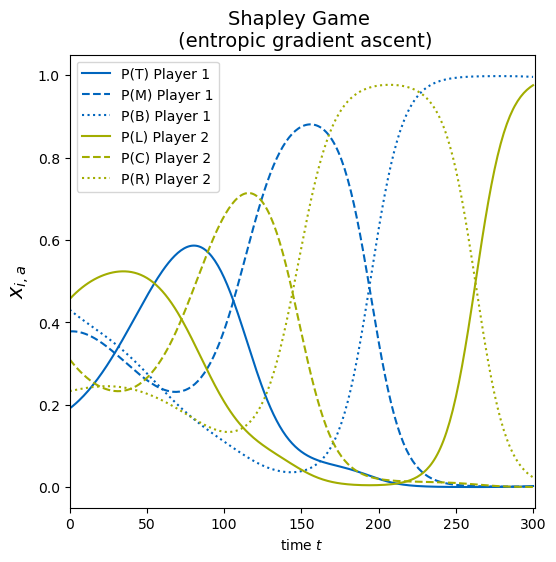

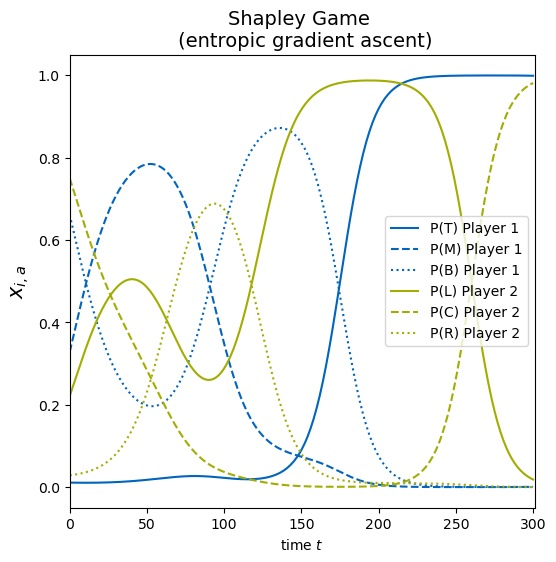

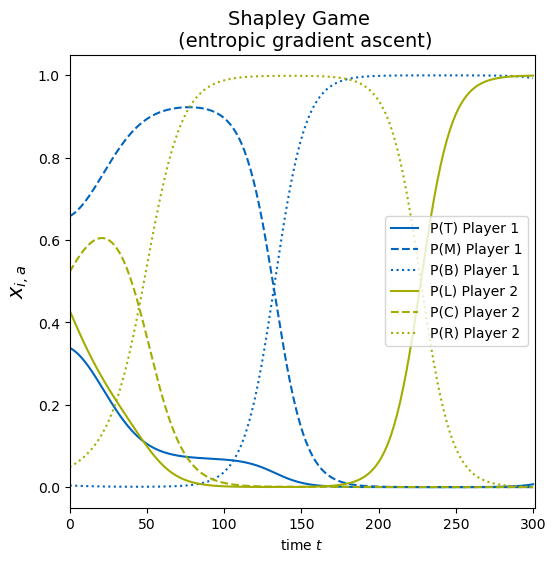

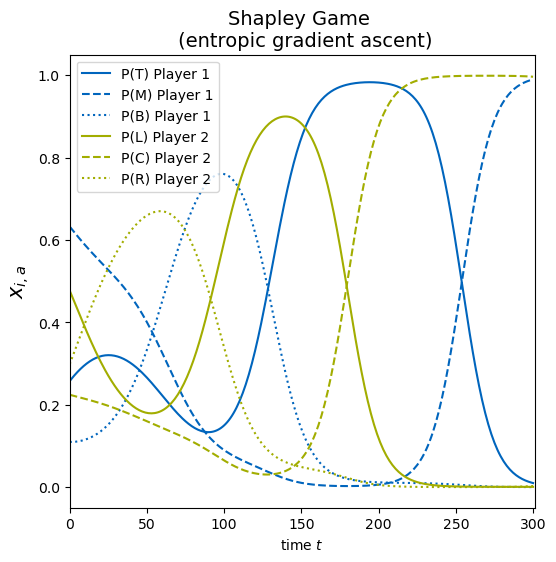

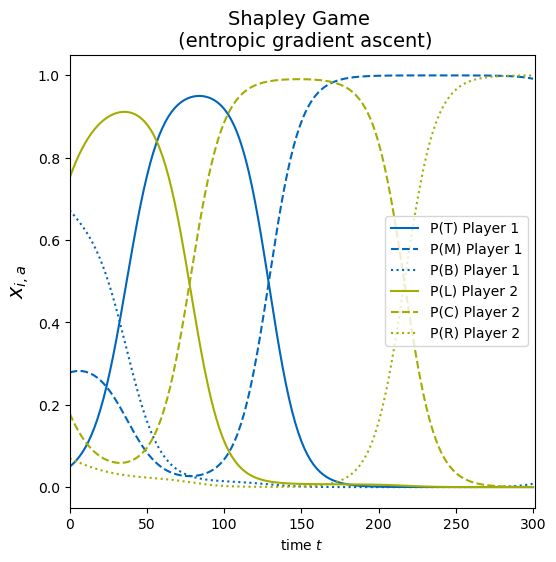

In [26]:
randomPlots(10, gameName, strategyNames, iterations, payoff1, payoff2, "EGA")

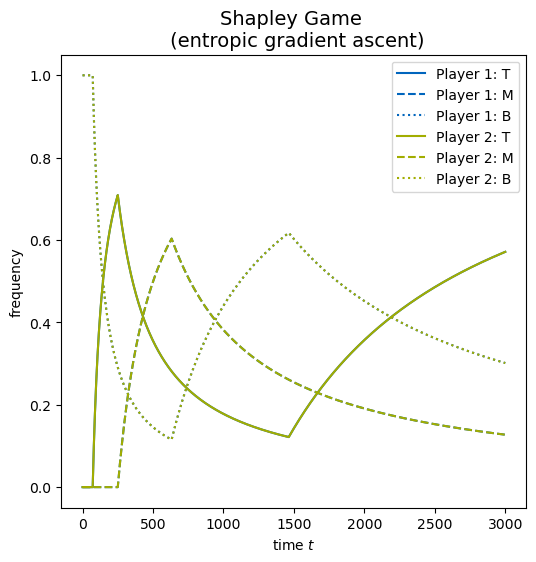

In [21]:
# EMPIRICAL FREQEUNCY DISTRIBUTION # 

p11Init = 0.1
p12Init = 0.1
p13Init = 0.8
p21Init = 0.3
p22Init = 0.1
p23Init = 0.6

iterations = int(3000)

pInit = [p11Init, p12Init, p13Init, p21Init, p22Init, p23Init]

frequencies = calculateFrequencies(pInit, iterations, payoff1, payoff2, "EGA")
plotFrequencies(iterations, frequencies, strategyNames, gameName, "EGA")